*NAYA SAFWAN: 2005599*
*NADINE NASHAAT:2006215*

In [ ]:
!pip3 install pyspark
!pip3 install findspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
# from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler




In [ ]:
import findspark
findspark.init()
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession

In [ ]:
df = pd.read_csv('egphotelbookings.csv')


In [ ]:
df.shape

(119390, 30)

links
https://www.javatpoint.com/countplot-in-python#:~:text=The%20countplot%20is%20used%20to,present%20in%20the%20categorical%20variable.&text=It%20uses%20the%20concept%20of%20a%20bar%20chart%20for%20the%20visual%20depiction.

https://seaborn.pydf.org/generated/seaborn.countplot.html

https://dba.stackexchange.com/questions/289475/select-maximum-of-a-count-in-a-grouped-clause

https://medium.com/@nutanbhogendrasharma/role-of-stringindexer-and-pipelines-in-pyspark-ml-feature-b79085bb8a6c

https://stackoverflow.com/questions/51070985/find-out-the-percentage-of-missing-values-in-each-column-in-the-given-dataset


# DATA CLEANING AND TRANSFORMATION

In [ ]:
df.head()

,Unnamed: 0,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,0,Renaissance Hotel,0,342,2018,July,27,1,0,0,...,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0
1,1,Renaissance Hotel,0,737,2018,July,27,1,0,0,...,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0
2,2,Renaissance Hotel,0,7,2018,July,27,1,0,1,...,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0
3,3,Renaissance Hotel,0,13,2018,July,27,1,0,1,...,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0
4,4,Renaissance Hotel,0,14,2018,July,27,1,0,2,...,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1


In [ ]:
df.isnull().sum()

Unnamed: 0                             0
hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
df.isnull().sum() * 100 / len(df)

Unnamed: 0                         0.000000
hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

company has 94% of missing values therefore we will drop this column and we will drop missing null values

In [ ]:
df = df.drop(['company'], axis=1)
df = df.drop(['Unnamed: 0'], axis=1)

remove rows with empty AGENT , COUNTRY , and CHILDREN

In [ ]:
df = df.dropna(subset=['agent'])
df = df.dropna(subset=['country'])
df = df.dropna(subset=['children'])



In [ ]:
df.shape

(102894, 28)

remove columns that won't be needed

In [ ]:
df = df.drop(['booking_changes','required_car_parking_spaces'], axis=1)


transform the types of meal as theyre not understandable from their abbrevations

In [ ]:
conditions = [
    (df['meal'] =='BB'),
   (df['meal'] =='HB'),  
    (df['meal'] =='FB'),  
     (df['meal'] =='SC'),  
 ]
results = ['breakfast-only', 'half-board','full-board','self-catering']
df['meal'] = np.select(conditions, results)

transform the types of distributional channel as theyre not understandable from their abbrevations

In [ ]:
df.rename(columns = {'adr':'average_daily_rate'}, inplace = True)


In [ ]:
df['arrival_date_month']=df['arrival_date_month'].astype(str)

transform the months from their names to their numbers

In [ ]:
conditions = [
    (df['arrival_date_month'] =='January'),
       (df['arrival_date_month'] =='February'),
              (df['arrival_date_month'] =='March'),
              (df['arrival_date_month'] =='April'),
              (df['arrival_date_month'] =='May'),
              (df['arrival_date_month'] =='June'),
              (df['arrival_date_month'] =='July'),
              (df['arrival_date_month'] =='August'),
              (df['arrival_date_month'] =='September'),
              (df['arrival_date_month'] =='October'),
              (df['arrival_date_month'] =='November'),
             (df['arrival_date_month'] =='December'),
 ]
results = [1,2,3,4,5,6,7,8,9,10,11,12]
df['arrival_date_month'] = np.select(conditions, results)

we will keep values of is_canceled and is_repeated_guest to 0 and 1 bec we will use them later in model

# VISUALIZATIONS

1)i wanted to see if over the years, visits to the hotels increase or not?

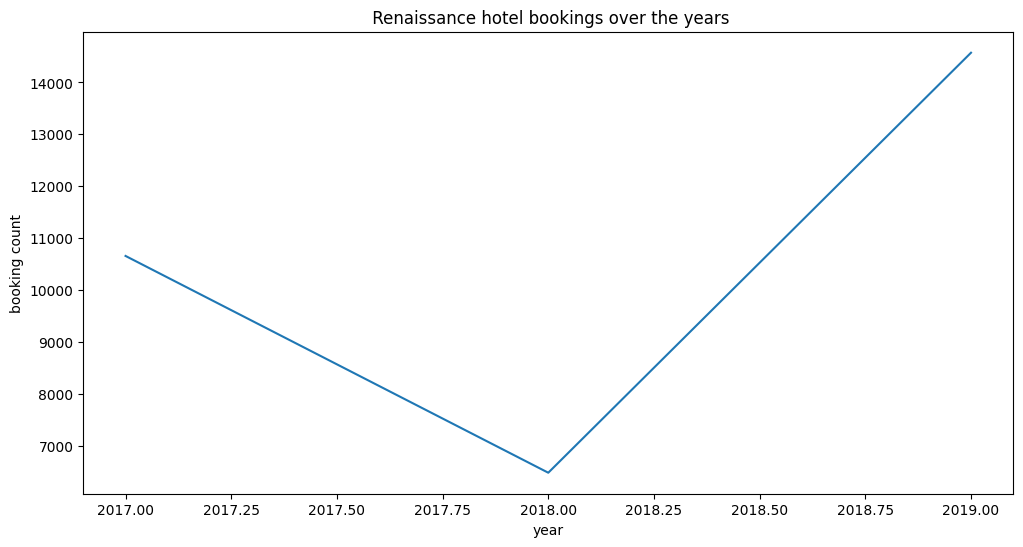

In [ ]:
years=df.loc[(df['hotel'] == 'Renaissance Hotel')]
years2 = years['arrival_date_year'].value_counts()

plt.figure(figsize=(12, 6))
sns.lineplot(x = years2.index, y = years2.values, data=years2)
plt.title(' Renaissance hotel bookings over the years')
plt.xlabel('year')
plt.ylabel('booking count')
plt.show()



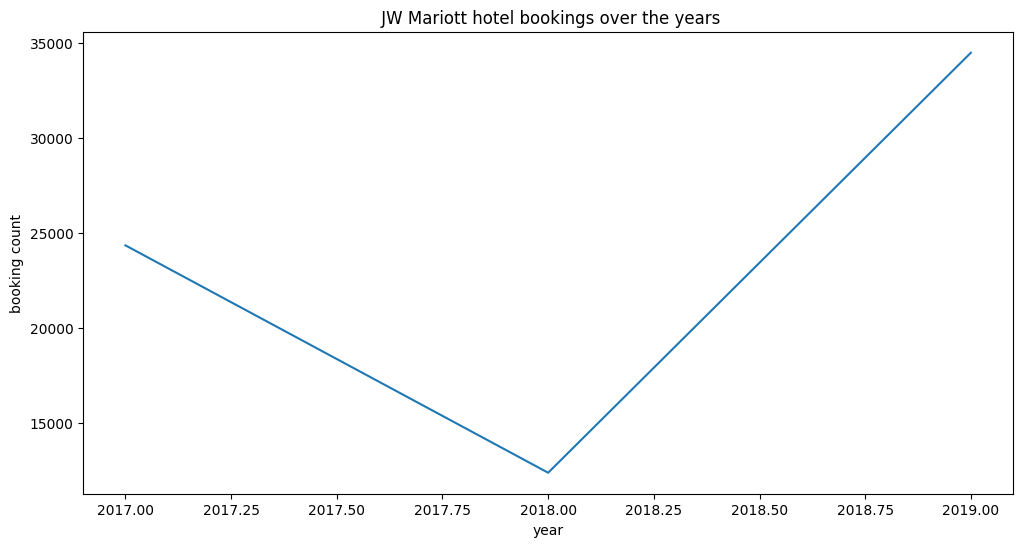

In [ ]:
years1=df.loc[(df['hotel'] == 'JW Marriott Hotel')]
years2 = years1['arrival_date_year'].value_counts()
plt.figure(figsize=(12, 6))
sns.lineplot(x = years2.index, y = years2.values, data=years2)
plt.title(' JW Mariott hotel bookings over the years')
plt.xlabel('year')
plt.ylabel('booking count')
plt.show()

**1)for both hotels, there was a sudden drop of bookings to the hotels in 2018 but it increased in 2019, still the bookings to Jw mariott are more than renaissance hotel**

2)i wanted to know how many customers go to renaissance hotel, and what are the months they mostly visit in

In [ ]:
renaissance=df.loc[df['hotel'] == 'Renaissance Hotel']


Text(0, 0.5, 'count')

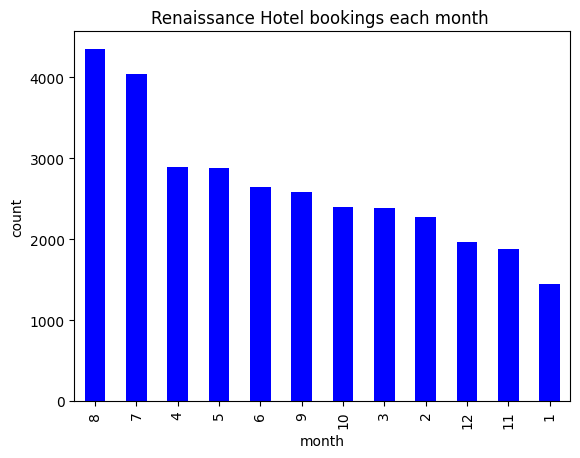

In [ ]:
from matplotlib import pyplot as plt


renaissance.arrival_date_month.value_counts().plot(kind = 'bar',color='blue')
plt.title('Renaissance Hotel bookings each month ')
plt.xlabel('month')
plt.ylabel('count')


2)i wanted to know how many customers go to Jw Mariott hotel, and what are  the months they mostly visit in

In [ ]:
mariot=df.loc[df['hotel'] == 'JW Marriott Hotel']


Text(0, 0.5, 'count')

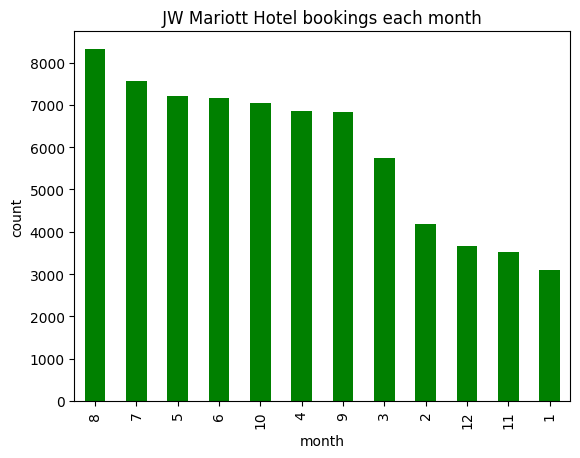

In [ ]:
mariot.arrival_date_month.value_counts().plot(kind = 'bar',color='green')
plt.title(' JW Mariott Hotel bookings each month ')
plt.xlabel('month')
plt.ylabel('count')

**2)i concluded that generally Jw Mariott has more number of visits than renaissance, but the months that have most visits are the same which are months 7 and 8, these are the months of summer vacation for most european countries**

3)i wanted to know which countries book the most in both hotels

In [ ]:
renaissance2=df.loc[(df['hotel'] == 'Renaissance Hotel')& (df['arrival_date_month'] == 8)]
top_countries = renaissance2['country'].value_counts().nlargest(10)
top_countries

PRT    1918
ESP     748
GBR     525
IRL     186
FRA     176
USA      86
CN       81
ITA      81
CHE      71
DEU      62
Name: country, dtype: int64

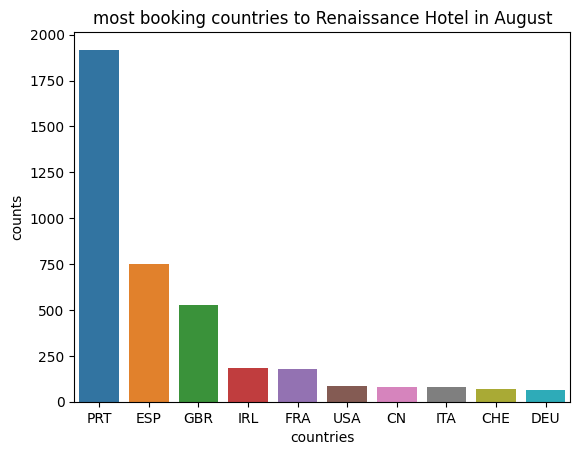

In [ ]:
fig=sns.countplot(x='country', data=renaissance2, order=top_countries.index)
plt.xlabel("countries")
plt.ylabel("counts")
plt.title("most booking countries to Renaissance Hotel in August") 
plt.show(fig)

In [ ]:
mariot2=df.loc[(df['hotel'] == 'JW Marriott Hotel')& (df['arrival_date_month'] == 8)]
top_countries2 = mariot2['country'].value_counts().nlargest(10)
top_countries2

PRT    2398
FRA    1062
ESP     901
DEU     778
GBR     661
ITA     563
BEL     245
NLD     197
USA     187
IRL     121
Name: country, dtype: int64

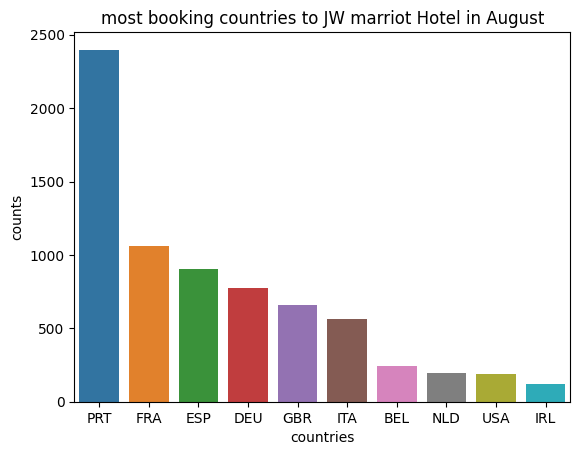

In [ ]:
fig2=sns.countplot(x='country', data=mariot2, order=top_countries2.index)
plt.xlabel("countries")
plt.ylabel("counts")
plt.title("most booking countries to JW marriot Hotel in August") 
plt.show(fig)

**3)for both hotels, the highest booking numbers are from portoguese**

4) which agencies are mostly booked from from portoguese as its the country were most bookings are from?

In [ ]:
renaissance3=df.loc[(df['hotel'] == 'Renaissance Hotel')& (df['arrival_date_month'] == 8)& (df['country'] == 'PRT')]
top_agencies = renaissance3['agent'].value_counts().nlargest(10)
top_agencies

240.0    874
250.0    315
241.0    108
242.0     84
196.0     66
5.0       51
15.0      46
314.0     44
6.0       36
40.0      26
Name: agent, dtype: int64

In [ ]:
mariot3=df.loc[(df['hotel'] == 'JW Marriott Hotel')& (df['arrival_date_month'] == 8)& (df['country'] == 'PRT')]
top_agencies2 = mariot3['agent'].value_counts().nlargest(10)
top_agencies2

1.0      1070
9.0       438
6.0       230
14.0      100
19.0       70
7.0        66
229.0      63
8.0        56
83.0       35
85.0       25
Name: agent, dtype: int64

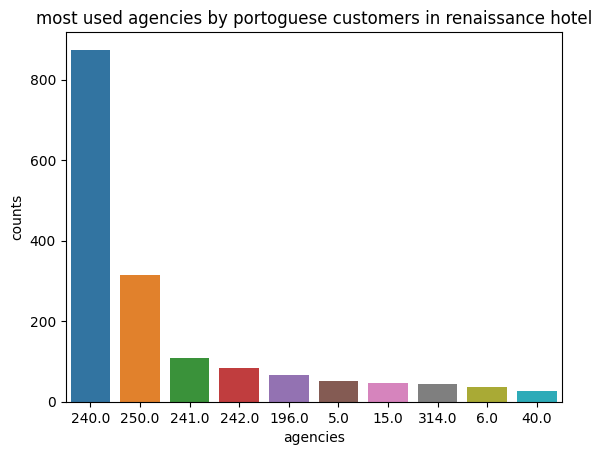

In [ ]:
fig2=sns.countplot(x='agent', data=renaissance3, order=top_agencies.index)
plt.xlabel("agencies")
plt.ylabel("counts")
plt.title("most used agencies by portoguese customers in renaissance hotel")
plt.show(fig)

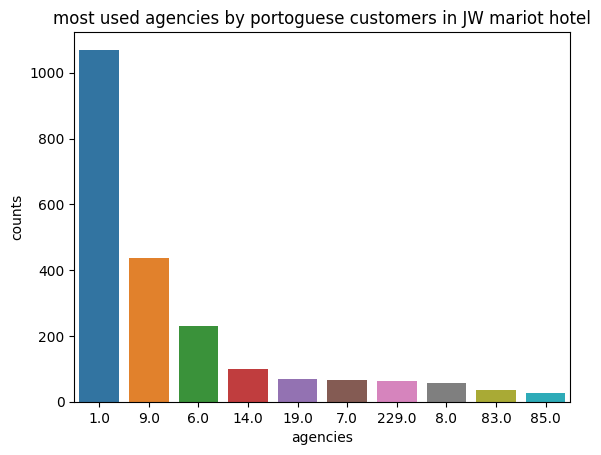

In [ ]:
fig2=sns.countplot(x='agent', data=mariot3, order=top_agencies2.index)
plt.xlabel("agencies")
plt.ylabel("counts")
plt.title("most used agencies by portoguese customers in JW mariot hotel") 
plt.show(fig)

**4) for renaissance hotel, 240 is the most requested agency, while for mariot its the agency with id 1.0**

5) which month has the hightest not canceled bookings in each hotel

In [ ]:
renaissance = df.loc[(df['hotel'] == 'Renaissance Hotel') & (df['is_canceled'] == 0)]
marriot = df.loc[(df['hotel'] == 'JW Marriott Hotel') & (df['is_canceled'] == 0)]

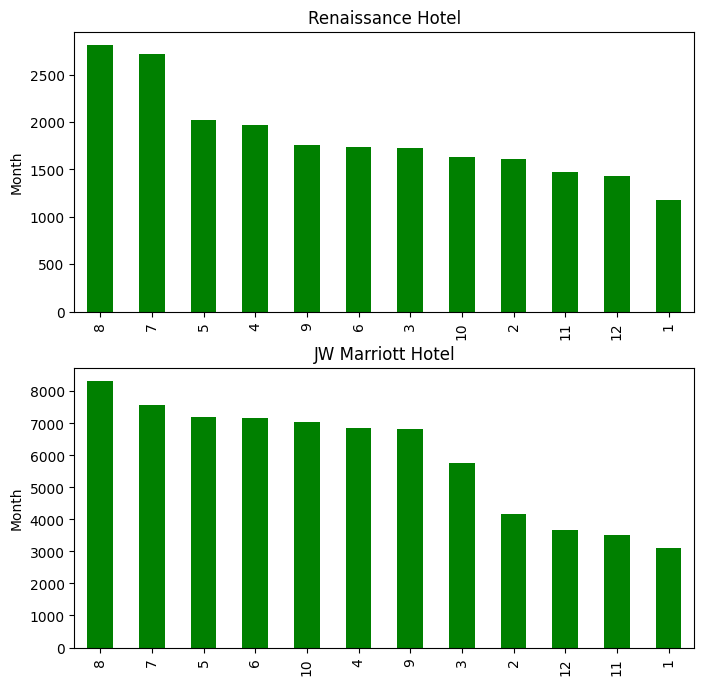

In [ ]:
plt.figure(figsize=(8, 8)) 
plt.subplot(2, 1, 1)
renaissance.arrival_date_month.value_counts().plot(kind = 'bar',color='green')
plt.ylabel('Month')
plt.title('Renaissance Hotel')

plt.subplot(2, 1, 2)
mariot.arrival_date_month.value_counts().plot(kind = 'bar',color='green')
plt.ylabel('Month')
plt.title('JW Marriott Hotel')

plt.show()

JW marriot has more bookings than renaissane, july and august are the most booked months

Is there correlation between days in wating list and cancled bookings ?

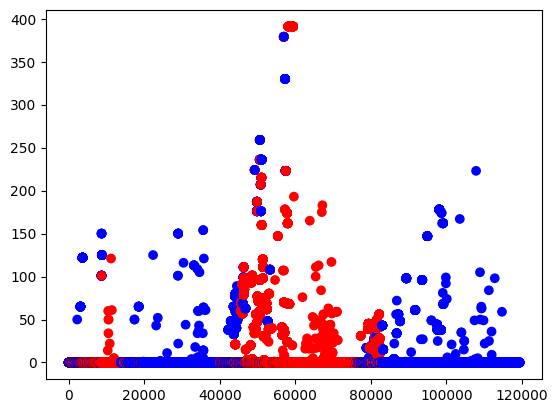

In [ ]:
plt.scatter(df.index, df['days_in_waiting_list'], c=np.where(df['is_canceled'] == 1, 'red', 'blue'))

we conclude that there are no correlations between waiting list and cancelling the booking

# PROMOTIONS USING SPARK SQL

In [ ]:
sc = SparkContext()
# Creating a spark session
spark = SparkSession \
    .builder \
    .appName("egypt hotels") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

In [ ]:
sdf = spark.createDataFrame(df) 

In [ ]:
sdf.printSchema()


root
 |-- hotel: string (nullable = true)
 |-- is_canceled: long (nullable = true)
 |-- lead_time: long (nullable = true)
 |-- arrival_date_year: long (nullable = true)
 |-- arrival_date_month: long (nullable = true)
 |-- arrival_date_week_number: long (nullable = true)
 |-- arrival_date_day_of_month: long (nullable = true)
 |-- stays_in_weekend_nights: long (nullable = true)
 |-- stays_in_week_nights: long (nullable = true)
 |-- adults: long (nullable = true)
 |-- children: double (nullable = true)
 |-- babies: long (nullable = true)
 |-- meal: string (nullable = true)
 |-- country: string (nullable = true)
 |-- distribution_channel: string (nullable = true)
 |-- is_repeated_guest: long (nullable = true)
 |-- previous_cancellations: long (nullable = true)
 |-- previous_bookings_not_canceled: long (nullable = true)
 |-- reserved_room_type: string (nullable = true)
 |-- assigned_room_type: string (nullable = true)
 |-- deposit_type: string (nullable = true)
 |-- agent: double (nullable 

In [ ]:
sdf.createOrReplaceTempView("df")

#   renaissance hotel queries

## provide 50% discount on any meals for any couples  coming to the hotel on valentines day with no booking cancellations


In [ ]:
spark.sql("SELECT * FROM df where arrival_date_day_of_month = 14 AND arrival_date_month=2 AND adults=2 AND children==0.0 AND babies=0 AND hotel='Renaissance Hotel'  AND is_canceled=0").show(50)

+-----------------+-----------+---------+-----------------+------------------+------------------------+-------------------------+-----------------------+--------------------+------+--------+------+--------------+-------+--------------------+-----------------+----------------------+------------------------------+------------------+------------------+------------+-----+--------------------+---------------+------------------+-------------------------+
|            hotel|is_canceled|lead_time|arrival_date_year|arrival_date_month|arrival_date_week_number|arrival_date_day_of_month|stays_in_weekend_nights|stays_in_week_nights|adults|children|babies|          meal|country|distribution_channel|is_repeated_guest|previous_cancellations|previous_bookings_not_canceled|reserved_room_type|assigned_room_type|deposit_type|agent|days_in_waiting_list|  customer_type|average_daily_rate|total_of_special_requests|
+-----------------+-----------+---------+-----------------+------------------+----------------

## provide 2 vouchers for free brekafast only  for a family of  maximum 4 on christmas day


In [ ]:
spark.sql("SELECT * FROM df where arrival_date_day_of_month==25 AND arrival_date_month==12  AND hotel = 'Renaissance Hotel' AND adults==2 AND children>0.0 AND children<=2.0   ").show()

+-----------------+-----------+---------+-----------------+------------------+------------------------+-------------------------+-----------------------+--------------------+------+--------+------+--------------+-------+--------------------+-----------------+----------------------+------------------------------+------------------+------------------+------------+-----+--------------------+-------------+------------------+-------------------------+
|            hotel|is_canceled|lead_time|arrival_date_year|arrival_date_month|arrival_date_week_number|arrival_date_day_of_month|stays_in_weekend_nights|stays_in_week_nights|adults|children|babies|          meal|country|distribution_channel|is_repeated_guest|previous_cancellations|previous_bookings_not_canceled|reserved_room_type|assigned_room_type|deposit_type|agent|days_in_waiting_list|customer_type|average_daily_rate|total_of_special_requests|
+-----------------+-----------+---------+-----------------+------------------+--------------------

## Provide discount on guests who booked from travel agencies or tour operators and paid refund

In [ ]:
spark.sql("SELECT agent,  COUNT(*) AS count FROM df WHERE distribution_channel Like 'TA%' GROUP BY agent ORDER BY count DESC").show(5)

+-----+-----+
|agent|count|
+-----+-----+
|  9.0|31939|
|240.0|13823|
|  1.0| 7191|
|  7.0| 3539|
|  6.0| 3279|
+-----+-----+
only showing top 5 rows



In [ ]:
spark.sql("SELECT * FROM df WHERE (agent = 9.0 OR agent = 240.0 or agent = 1.0 ) and hotel='Renaissance Hotel' and deposit_type != 'No Deposit'").show()

+-----------------+-----------+---------+-----------------+------------------+------------------------+-------------------------+-----------------------+--------------------+------+--------+------+--------------+-------+--------------------+-----------------+----------------------+------------------------------+------------------+------------------+------------+-----+--------------------+-------------+------------------+-------------------------+
|            hotel|is_canceled|lead_time|arrival_date_year|arrival_date_month|arrival_date_week_number|arrival_date_day_of_month|stays_in_weekend_nights|stays_in_week_nights|adults|children|babies|          meal|country|distribution_channel|is_repeated_guest|previous_cancellations|previous_bookings_not_canceled|reserved_room_type|assigned_room_type|deposit_type|agent|days_in_waiting_list|customer_type|average_daily_rate|total_of_special_requests|
+-----------------+-----------+---------+-----------------+------------------+--------------------

# JW mariot hotel queries

## provide 50% discount on any meals for any couples  coming to the hotel on valentines day with no booking cancellations


In [ ]:
spark.sql("SELECT * FROM df where arrival_date_day_of_month = 14 AND arrival_date_month=2 AND adults=2 AND children=0.0 AND babies=0 AND hotel='JW Marriott Hotel'  AND is_canceled=0").show(50)

+-----------------+-----------+---------+-----------------+------------------+------------------------+-------------------------+-----------------------+--------------------+------+--------+------+--------------+-------+--------------------+-----------------+----------------------+------------------------------+------------------+------------------+------------+-----+--------------------+---------------+------------------+-------------------------+
|            hotel|is_canceled|lead_time|arrival_date_year|arrival_date_month|arrival_date_week_number|arrival_date_day_of_month|stays_in_weekend_nights|stays_in_week_nights|adults|children|babies|          meal|country|distribution_channel|is_repeated_guest|previous_cancellations|previous_bookings_not_canceled|reserved_room_type|assigned_room_type|deposit_type|agent|days_in_waiting_list|  customer_type|average_daily_rate|total_of_special_requests|
+-----------------+-----------+---------+-----------------+------------------+----------------

##  provide 2 vouchers for free self catering for a family of  maximum 4 on christmas day


In [ ]:
spark.sql("SELECT * FROM df where arrival_date_day_of_month=25 AND arrival_date_month=12 AND meal='self-catering' AND adults=2 AND children>0.0 ").show()

+-----------------+-----------+---------+-----------------+------------------+------------------------+-------------------------+-----------------------+--------------------+------+--------+------+-------------+-------+--------------------+-----------------+----------------------+------------------------------+------------------+------------------+------------+-----+--------------------+-------------+------------------+-------------------------+
|            hotel|is_canceled|lead_time|arrival_date_year|arrival_date_month|arrival_date_week_number|arrival_date_day_of_month|stays_in_weekend_nights|stays_in_week_nights|adults|children|babies|         meal|country|distribution_channel|is_repeated_guest|previous_cancellations|previous_bookings_not_canceled|reserved_room_type|assigned_room_type|deposit_type|agent|days_in_waiting_list|customer_type|average_daily_rate|total_of_special_requests|
+-----------------+-----------+---------+-----------------+------------------+----------------------

## Provide discount on guests who booked from travel agencies or tour operators and paid refund

In [ ]:
spark.sql("SELECT agent,  COUNT(*) AS count FROM df WHERE distribution_channel Like 'TA%' GROUP BY agent ORDER BY count DESC").show(5)

+-----+-----+
|agent|count|
+-----+-----+
|  9.0|31939|
|240.0|13823|
|  1.0| 7191|
|  7.0| 3539|
|  6.0| 3279|
+-----+-----+
only showing top 5 rows



In [ ]:
spark.sql("SELECT * FROM df WHERE (agent = 9.0 OR agent = 240.0 or agent = 1.0 ) and hotel='JW Marriott Hotel' and deposit_type != 'No Deposit'").show()

+-----------------+-----------+---------+-----------------+------------------+------------------------+-------------------------+-----------------------+--------------------+------+--------+------+--------------+-------+--------------------+-----------------+----------------------+------------------------------+------------------+------------------+------------+-----+--------------------+---------------+------------------+-------------------------+
|            hotel|is_canceled|lead_time|arrival_date_year|arrival_date_month|arrival_date_week_number|arrival_date_day_of_month|stays_in_weekend_nights|stays_in_week_nights|adults|children|babies|          meal|country|distribution_channel|is_repeated_guest|previous_cancellations|previous_bookings_not_canceled|reserved_room_type|assigned_room_type|deposit_type|agent|days_in_waiting_list|  customer_type|average_daily_rate|total_of_special_requests|
+-----------------+-----------+---------+-----------------+------------------+----------------

In [ ]:
df['deposit_type'].value_counts()

No Deposit    90324
Non Refund    12522
Refundable       48
Name: deposit_type, dtype: int64

# Models

In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml import Pipeline
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import LogisticRegression
from sklearn.metrics import accuracy_score
from pyspark.ml.feature import StringIndexer
from pyspark.ml.classification import NaiveBayes
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.classification import LinearSVC
from pyspark.ml.classification import MultilayerPerceptronClassifier

convert categorical data into numerical

In [ ]:
spark = SparkSession.builder.appName('hotelBooking').getOrCreate()

sparkML= spark.createDataFrame(df)

In [ ]:
columns = ['hotel', 'arrival_date_month', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type']
for i in columns :
  indexer = StringIndexer(inputCol= i, outputCol= i + 'Index')
  sparkML = indexer.fit(sparkML).transform(sparkML)
sparkML.show()

+-----------------+-----------+---------+-----------------+------------------+------------------------+-------------------------+-----------------------+--------------------+------+--------+------+--------------+-------+--------------------+-----------------+----------------------+------------------------------+------------------+------------------+------------+-----+--------------------+-------------+------------------+-------------------------+----------+-----------------------+-------------------------+-----------------------+-----------------------+-----------------+------------------+
|            hotel|is_canceled|lead_time|arrival_date_year|arrival_date_month|arrival_date_week_number|arrival_date_day_of_month|stays_in_weekend_nights|stays_in_week_nights|adults|children|babies|          meal|country|distribution_channel|is_repeated_guest|previous_cancellations|previous_bookings_not_canceled|reserved_room_type|assigned_room_type|deposit_type|agent|days_in_waiting_list|customer_typ

we will drop some columns that will not be needed for model

In [ ]:
columns_to_drop = [ 'country' ,'meal', 'adr', 'required_car_parking_spaces','total_of_special_requests', 'hotel', 'arrival_date_month', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type']
sparkML = sparkML.drop(*columns_to_drop)
sparkML.show(5)

+-----------+---------+-----------------+------------------------+-------------------------+-----------------------+--------------------+------+--------+------+-----------------+----------------------+------------------------------+-----+--------------------+------------------+----------+-----------------------+-------------------------+-----------------------+-----------------------+-----------------+------------------+
|is_canceled|lead_time|arrival_date_year|arrival_date_week_number|arrival_date_day_of_month|stays_in_weekend_nights|stays_in_week_nights|adults|children|babies|is_repeated_guest|previous_cancellations|previous_bookings_not_canceled|agent|days_in_waiting_list|average_daily_rate|hotelIndex|arrival_date_monthIndex|distribution_channelIndex|reserved_room_typeIndex|assigned_room_typeIndex|deposit_typeIndex|customer_typeIndex|
+-----------+---------+-----------------+------------------------+-------------------------+-----------------------+--------------------+------+------

In [ ]:
featurizationPipeline = Pipeline(stages = [VectorAssembler(inputCols=sparkML.columns[1:], outputCol="is_cancelled_vector")])
featurizationPipelineModel = featurizationPipeline.fit(sparkML)
sparkML = featurizationPipelineModel.transform(sparkML)
sparkML.show(5)

+-----------+---------+-----------------+------------------------+-------------------------+-----------------------+--------------------+------+--------+------+-----------------+----------------------+------------------------------+-----+--------------------+------------------+----------+-----------------------+-------------------------+-----------------------+-----------------------+-----------------+------------------+--------------------+
|is_canceled|lead_time|arrival_date_year|arrival_date_week_number|arrival_date_day_of_month|stays_in_weekend_nights|stays_in_week_nights|adults|children|babies|is_repeated_guest|previous_cancellations|previous_bookings_not_canceled|agent|days_in_waiting_list|average_daily_rate|hotelIndex|arrival_date_monthIndex|distribution_channelIndex|reserved_room_typeIndex|assigned_room_typeIndex|deposit_typeIndex|customer_typeIndex| is_cancelled_vector|
+-----------+---------+-----------------+------------------------+-------------------------+----------------

In [ ]:
train, test = sparkML.randomSplit([0.8, 0.2], seed = 2018)

lr = LogisticRegression(featuresCol = 'is_cancelled_vector', labelCol = 'is_canceled', maxIter=10)

lrModel = lr.fit(train)
predictions = lrModel.transform(test)

true_labels=predictions.select('is_canceled')
lr_predictions=predictions.select('prediction')

accuracy = accuracy_score(true_labels.toPandas(), lr_predictions.toPandas())
print("Logistic Regression Accuracy =",accuracy*100,"%")

Logistic Regression Accuracy = 75.98244758654315 %


In [ ]:
train, test = sparkML.randomSplit([0.8, 0.2], seed = 2018)
dtClassifier = DecisionTreeClassifier(featuresCol='is_cancelled_vector', labelCol='is_canceled')

dtModel = dtClassifier.fit(train)

predictions = dtModel.transform(test)

true_labels=predictions.select('is_canceled')
lr_predictions=predictions.select('prediction')

accuracy = accuracy_score(true_labels.toPandas(), lr_predictions.toPandas())
print("Decision Tree Accuracy =",accuracy*100,"%")

Decision Tree Accuracy = 75.66065333983423 %


In [ ]:
train, test = sparkML.randomSplit([0.8, 0.2], seed = 2018)
svmModel = LinearSVC(featuresCol='is_cancelled_vector', labelCol='is_canceled')
svmModel = svmModel.fit(train)
predictions = svmModel.transform(test)

true_labels=predictions.select('is_canceled')
lr_predictions=predictions.select('prediction')

accuracy = accuracy_score(true_labels.toPandas(), lr_predictions.toPandas())
print("Support Vector Machine Accuracy =",accuracy*100,"%")

Support Vector Machine Accuracy = 75.58751828376403 %


In [ ]:
sparkML = sparkML.withColumnRenamed('is_cancelled_vector', 'features')
sparkML = sparkML.withColumnRenamed('is_canceled', 'label')
train, test = sparkML.randomSplit([0.8, 0.2], seed=2018)
layers = [ 22, 14, 4, 2 ]
nnModel = MultilayerPerceptronClassifier(layers=layers, seed=1234)
nnModel = nnModel.fit(train)

predictions = nnModel.transform(test)
true_labels=predictions.select('label')
lr_predictions=predictions.select('prediction')

accuracy = accuracy_score(true_labels.toPandas(), lr_predictions.toPandas())
print("Multilayer Perceptron Classifier =",accuracy*100,"%")

Multilayer Perceptron Classifier = 61.50658215504632 %


**we can conclude that Multilayer Perceptron gives lowest accuracy**